Importing the requried libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Load the dataset

In [ ]:
df = pd.read_csv('/content/ipl_matches - ipl_matches.csv')

In [ ]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
df.isnull().sum()

,0
id,0
Season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [ ]:
# Dropping the columns
df = df.drop(columns=["id", "date", "player_of_match", "venue", "umpire1", "umpire2", "umpire3"])

In [ ]:
# Check any number of columns with NaN or missing values
print(df.isnull().any().sum(), ' / ', len(df.columns))

2  /  11


In [ ]:
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

11  /  756


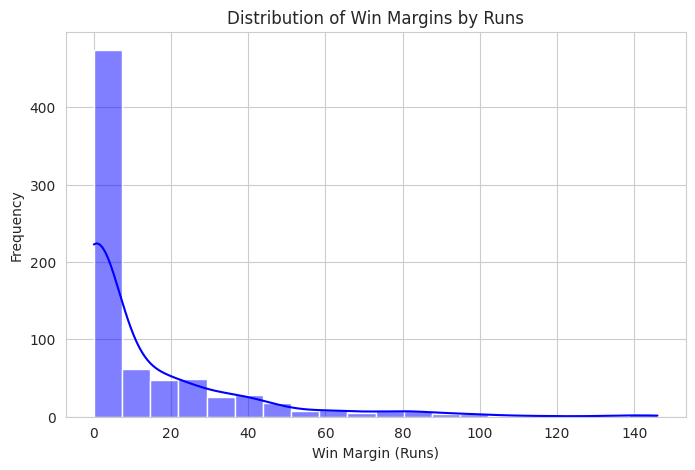

In [ ]:
# 1. Win Margin Distribution (Runs)
plt.figure(figsize=(8, 5))
sns.histplot(df["win_by_runs"], bins=20, kde=True, color="blue")
plt.xlabel("Win Margin (Runs)")
plt.ylabel("Frequency")
plt.title("Distribution of Win Margins by Runs")
plt.show()

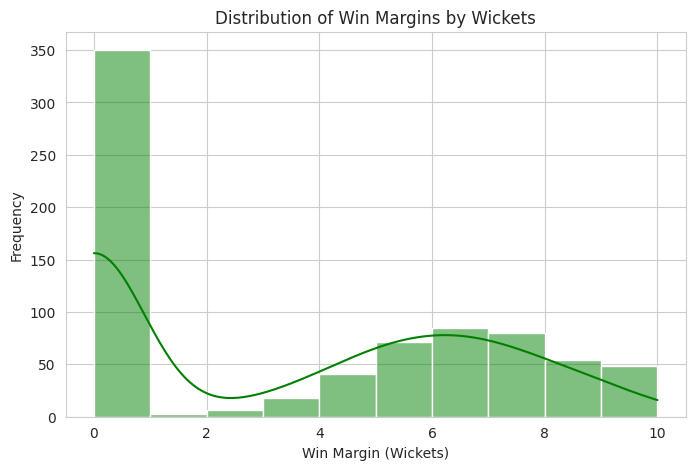

In [ ]:
# 2. Win Margin Distribution (Wickets)
plt.figure(figsize=(8, 5))
sns.histplot(df["win_by_wickets"], bins=10, kde=True, color="green")
plt.xlabel("Win Margin (Wickets)")
plt.ylabel("Frequency")
plt.title("Distribution of Win Margins by Wickets")
plt.show()

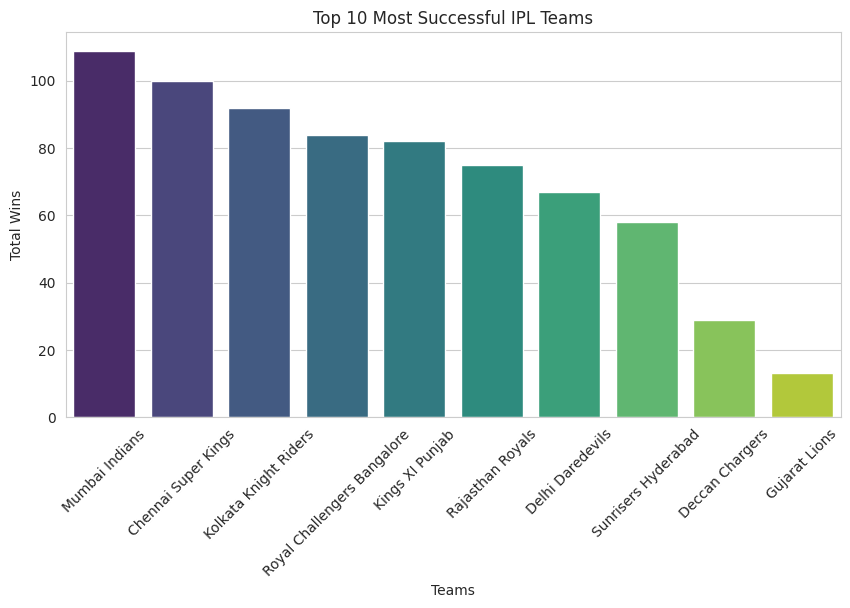

In [ ]:
# 3. Most Successful Teams
plt.figure(figsize=(10, 5))
top_teams = df["winner"].value_counts().head(10)
sns.barplot(x=top_teams.index, y=top_teams.values, palette="viridis")
plt.xlabel("Teams")
plt.ylabel("Total Wins")
plt.title("Top 10 Most Successful IPL Teams")
plt.xticks(rotation=45)
plt.show()

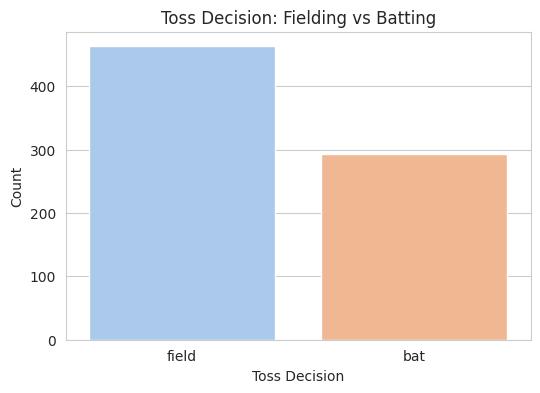

In [ ]:
# 4. Toss Decision Impact
plt.figure(figsize=(6, 4))
sns.countplot(x=df["toss_decision"], palette="pastel")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.title("Toss Decision: Fielding vs Batting")
plt.show()

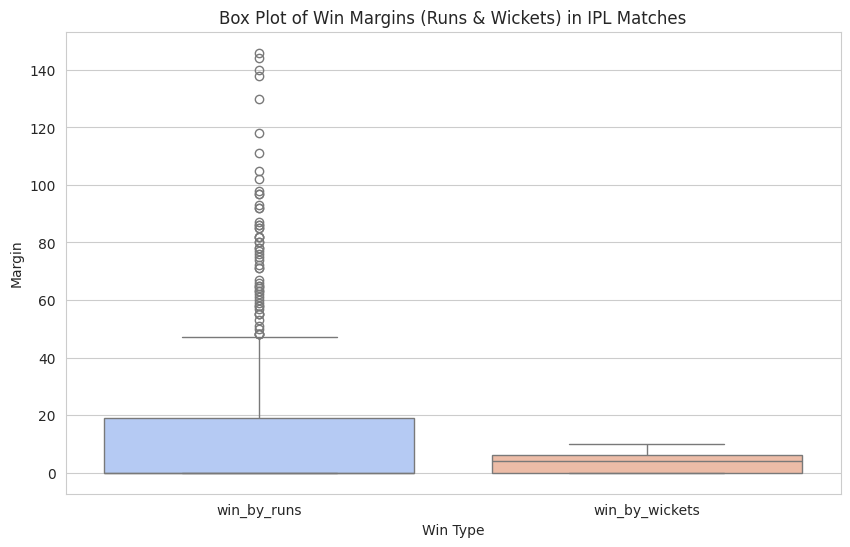

In [ ]:
# Create a figure for the box plot
plt.figure(figsize=(10, 6))

# Boxplot for win margins by runs and wickets
sns.boxplot(data=df[["win_by_runs", "win_by_wickets"]], palette="coolwarm")

# Labels and title
plt.xlabel("Win Type")
plt.ylabel("Margin")
plt.title("Box Plot of Win Margins (Runs & Wickets) in IPL Matches")

# Show the plot
plt.show()

In [ ]:
# Check the percentage of missing data for each column
print((df.isnull().sum() / len(df)) * 100)

Season            0.000000
city              0.925926
team1             0.000000
team2             0.000000
toss_winner       0.000000
toss_decision     0.000000
result            0.000000
dl_applied        0.000000
winner            0.529101
win_by_runs       0.000000
win_by_wickets    0.000000
dtype: float64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Drop rows with missing values
df_cleaned = df.ffill()

# Encode categorical variables
label_encoders = {}
categorical_cols = ["Season", "city", "team1", "team2", "toss_winner", "toss_decision", "winner", "result"]

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Select features (X) and target variable (y)
X = df_cleaned.drop(columns=["winner"])
y = df_cleaned["winner"]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing Done")


Data Preprocessing Done ✅


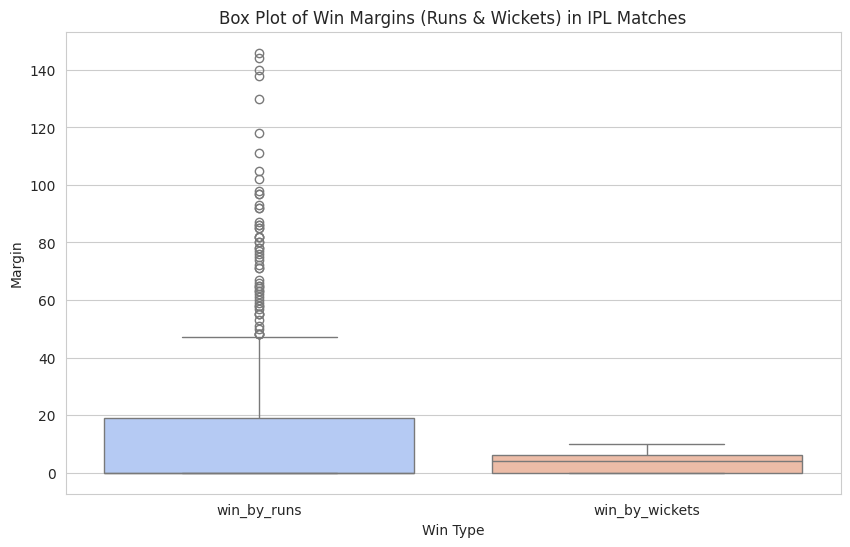

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create a figure for the box plot
plt.figure(figsize=(10, 6))

# Boxplot for win margins by runs and wickets
sns.boxplot(data=df_cleaned[["win_by_runs", "win_by_wickets"]], palette="coolwarm")

# Labels and title
plt.xlabel("Win Type")
plt.ylabel("Margin")
plt.title("Box Plot of Win Margins (Runs & Wickets) in IPL Matches")

# Show the plot
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define SVM hyperparameter grid
param_grid = {
    "C": [0.1, 1, 10],  # Regularization parameter
    "kernel": ["linear", "rbf", "poly"],  # Different kernel functions
    "gamma": ["scale", "auto"]  # Kernel coefficient for 'rbf' and 'poly'
}

# Perform Grid Search
svm_model = SVC(random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best SVM Parameters:", best_params)
print("Best Training Accuracy:", best_score)


Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Training Accuracy: 0.620771349862259


In [ ]:
from sklearn.metrics import accuracy_score

# Train the best model on the full training set
best_svm = SVC(**best_params, random_state=42)
best_svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_svm.predict(X_test_scaled)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy of Optimized SVM Model:", test_accuracy)


Test Accuracy of Optimized SVM Model: 0.6578947368421053
